In [8]:
from BorutaShap import BorutaShap, load_data
from xgboost import XGBClassifier,XGBRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X,y = load_data()
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Decision Tree

In [2]:
model = DecisionTreeClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.72it/s]

4 attributes confirmed important: ['area error', 'worst concave points', 'worst radius', 'worst texture']
26 attributes confirmed unimportant: ['worst smoothness', 'worst area', 'worst fractal dimension', 'fractal dimension error', 'mean radius', 'worst perimeter', 'mean texture', 'concavity error', 'mean symmetry', 'perimeter error', 'mean area', 'symmetry error', 'worst compactness', 'mean concavity', 'mean concave points', 'mean compactness', 'mean perimeter', 'concave points error', 'radius error', 'mean smoothness', 'worst concavity', 'texture error', 'mean fractal dimension', 'worst symmetry', 'smoothness error', 'compactness error']
0 tentative attributes remains: []


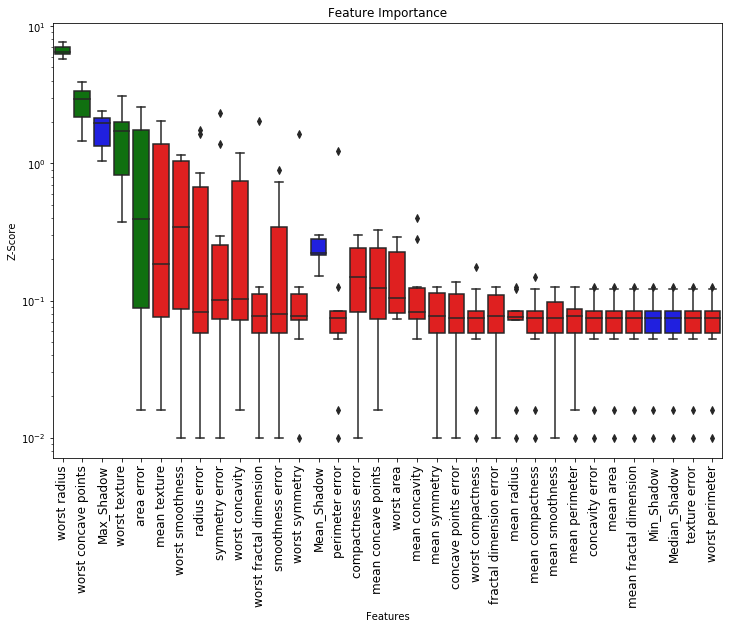

In [3]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# Random Forest

In [9]:
model = RandomForestClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.03it/s]

20 attributes confirmed important: ['worst smoothness', 'worst area', 'mean texture', 'concavity error', 'mean area', 'area error', 'mean concave points', 'worst concavity', 'perimeter error', 'mean radius', 'worst perimeter', 'worst texture', 'worst compactness', 'mean concavity', 'worst concave points', 'mean compactness', 'mean perimeter', 'radius error', 'worst symmetry', 'worst radius']
7 attributes confirmed unimportant: ['fractal dimension error', 'mean symmetry', 'texture error', 'mean fractal dimension', 'symmetry error', 'smoothness error', 'compactness error']
3 tentative attributes remains: ['concave points error', 'mean smoothness', 'worst fractal dimension']


In [10]:
Feature_Selector.TentativeRoughFix()

1 tentative features are now accepted: ['concave points error']
2 tentative features are now rejected: ['mean smoothness' 'worst fractal dimension']


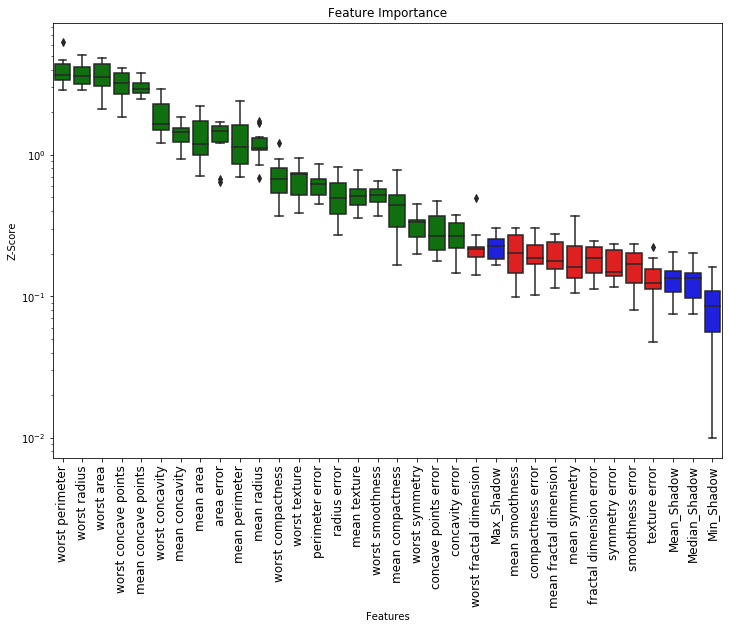

In [11]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# XGBoost

In [4]:
model = XGBClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.39it/s]

11 attributes confirmed important: ['area error', 'mean concave points', 'worst concave points', 'worst smoothness', 'worst area', 'worst perimeter', 'mean texture', 'worst concavity', 'worst texture', 'worst radius', 'compactness error']
19 attributes confirmed unimportant: ['worst fractal dimension', 'concavity error', 'mean area', 'symmetry error', 'texture error', 'mean fractal dimension', 'smoothness error', 'perimeter error', 'mean radius', 'fractal dimension error', 'mean symmetry', 'worst compactness', 'mean concavity', 'mean compactness', 'mean perimeter', 'concave points error', 'radius error', 'mean smoothness', 'worst symmetry']
0 tentative attributes remains: []


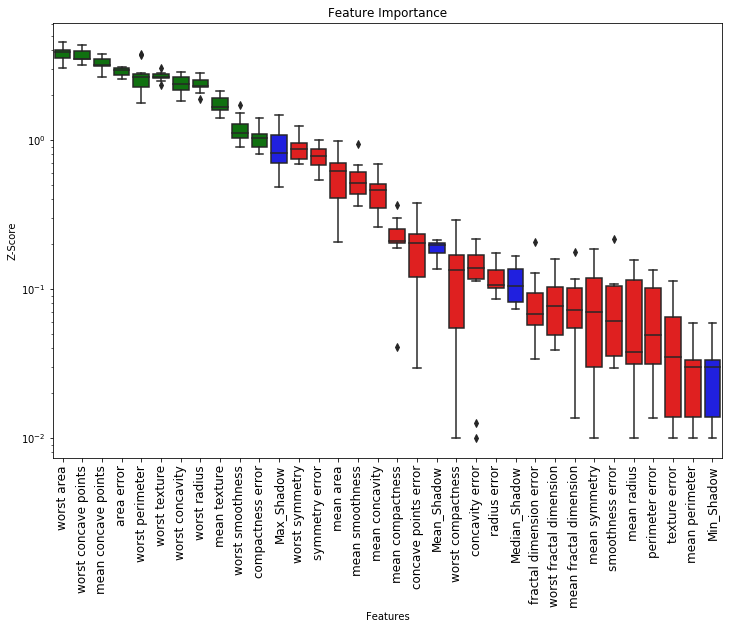

In [5]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

# Catboost

In [12]:
model = CatBoostClassifier()

# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [13:45<00:00,  8.26s/it]

19 attributes confirmed important: ['worst smoothness', 'worst area', 'mean texture', 'mean area', 'area error', 'mean concave points', 'worst concavity', 'perimeter error', 'mean radius', 'worst perimeter', 'worst texture', 'worst compactness', 'mean concavity', 'worst concave points', 'mean perimeter', 'radius error', 'mean smoothness', 'worst symmetry', 'worst radius']
9 attributes confirmed unimportant: ['mean compactness', 'fractal dimension error', 'worst fractal dimension', 'mean symmetry', 'concavity error', 'texture error', 'mean fractal dimension', 'symmetry error', 'smoothness error']
2 tentative attributes remains: ['compactness error', 'concave points error']


In [13]:
Feature_Selector.TentativeRoughFix()

0 tentative features are now accepted: []
2 tentative features are now rejected: ['compactness error' 'concave points error']


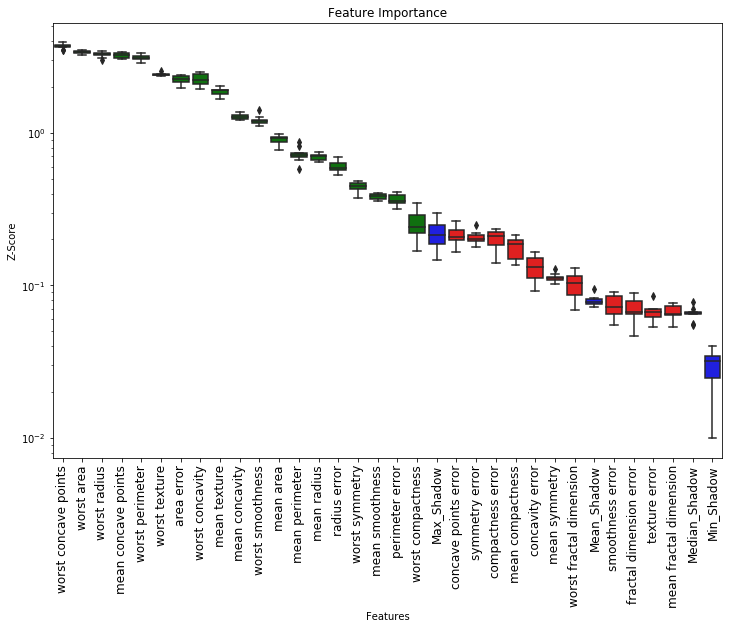

In [14]:
# Returns Boxplot of features
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')